In [1]:
import pandas as pd
import lzma

df_reddit = pd.read_csv(
    lzma.open("../data/reddit_opinion_PSE_ISR.csv.lzma"), low_memory=False)

df_acled = pd.read_csv("../data/acled_middle_east_data.csv")

/var/folders/8s/5kb_fl851lbfqsvhg3z5m8ww0000gn/T/ipykernel_35277/1915750956.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_reddit.columns

Index(['comment_id', 'score', 'self_text', 'subreddit', 'created_time',
       'post_id', 'author_name', 'controversiality', 'ups', 'downs',
       'user_is_verified', 'user_account_created_time', 'user_awardee_karma',
       'user_awarder_karma', 'user_link_karma', 'user_comment_karma',
       'user_total_karma', 'post_score', 'post_self_text', 'post_title',
       'post_upvote_ratio', 'post_thumbs_ups', 'post_total_awards_received',
       'post_created_time'],
      dtype='object')

In [3]:
df_reddit['created_time'].max()

'2023-12-15 22:44:56'

- do sentiment analysis --> percent positive / negative in last 7 days
- things to evaluate over 7 days


In [5]:
import pandas as pd
from datetime import timedelta
import math

# DON"T RUN THE REST OF THIS UNLESS YOU WANT TO CHANGE PREV_DAYS AND CREATE THE DATASET ALL OVER

# PREV_DAYS = 5

# seven_days_avg_df = pd.DataFrame()

# df_reddit['user_account_created_time'] = pd.to_datetime(
#     df_reddit['user_account_created_time']).dt.normalize()

# df_acled['event_date'] = pd.to_datetime(
#     df_acled['event_date']).dt.normalize()

# df_reddit['created_time'] = pd.to_datetime(
#     df_reddit['created_time']).dt.normalize()

# periods_between = math.ceil((df_reddit['created_time'].max() -
#                              df_reddit['created_time'].min()).days/PREV_DAYS)

# times = [df_reddit['created_time'].min() + timedelta(days=PREV_DAYS*i)
#          for i in range(1, periods_between+1)]

# df_reddit.dropna(subset=['created_time', 'controversiality', "user_is_verified",
#                  "user_total_karma", "post_total_awards_received"], inplace=True)

# for time in times:
#     events_count = df_acled.loc[df_acled["event_date"]
#                                 < time]["event_date"].count()
#     filtered_reddit = df_reddit.loc[df_reddit["created_time"] < time]

#     total_posts = filtered_reddit.shape[0]
#     if total_posts > 0:
#         percentage_controversial_posts = filtered_reddit['controversiality'].sum(
#         ) / total_posts * 100
#         percentage_verified_users = filtered_reddit['user_is_verified'].sum(
#         ) / total_posts * 100
#         avg_user_total_karma = filtered_reddit["user_total_karma"].mean()
#         sum_post_awards_received = filtered_reddit["post_total_awards_received"].sum(
#         )
#         avg_post_score = filtered_reddit["score"].mean()
#         min_max_post_range = filtered_reddit["score"].max(
#         ) - filtered_reddit["score"].min()
#         percentage_acc_created_last_month = (filtered_reddit.loc[filtered_reddit['user_account_created_time'] > (
#             time-timedelta(days=93))].shape[0] / total_posts) * 100
#         avg_comment_karma_recieved = filtered_reddit["user_comment_karma"].mean(
#         )
#     else:
#         percentage_controversial_posts = 0
#         percentage_verified_users = 0
#         avg_user_total_karma = 0
#         avg_post_awards_received = 0

#     temp_df = pd.DataFrame([{
#         'events_count': events_count,
#         'percentage_controversial_posts': percentage_controversial_posts,
#         'percentage_verified_users': percentage_verified_users,
#         'sum_post_awards_received': sum_post_awards_received,
#         'avg_user_total_karma': avg_user_total_karma,
#         'percentage_acc_created_last_month': percentage_acc_created_last_month,
#         'avg_post_score': avg_post_score,
#         'min_max_post_range': min_max_post_range,
#         'avg_comment_karma_recieved': avg_comment_karma_recieved
#     }])

#     seven_days_avg_df = pd.concat(
#         [seven_days_avg_df, temp_df], ignore_index=True)

# seven_days_avg_df.to_csv(f'modified_{PREV_DAYS}_days.csv')

In [12]:
seven_days_avg_df = pd.read_csv(
    f'modified_{PREV_DAYS}_days.csv').drop(["Unnamed: 0"], axis=1)

seven_days_avg_df.head(1)

,events_count,percentage_controversial_posts,percentage_verified_users,sum_post_awards_received,avg_user_total_karma,percentage_acc_created_last_month,avg_post_score,min_max_post_range,avg_comment_karma_recieved
0,3363,8.362369,83.972125,0,41308.864111,4.878049,46.773519,2622,32937.236934


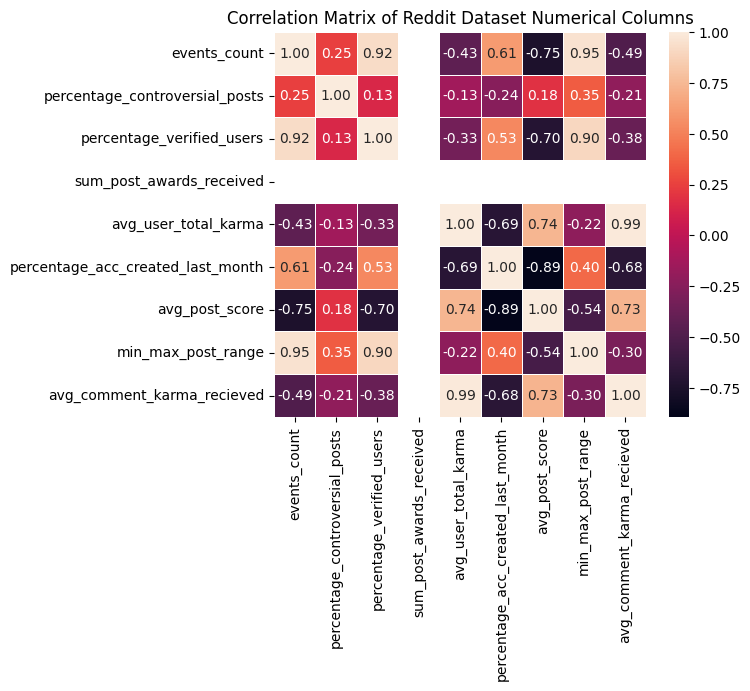

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = seven_days_avg_df.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Reddit Dataset Numerical Columns')
plt.show()

In [15]:
correlation_matrix["events_count"].sort_values()

avg_post_score                      -0.745813
avg_comment_karma_recieved          -0.494381
avg_user_total_karma                -0.427066
percentage_controversial_posts       0.245636
percentage_acc_created_last_month    0.610249
percentage_verified_users            0.924674
min_max_post_range                   0.950726
events_count                         1.000000
sum_post_awards_received                  NaN
Name: events_count, dtype: float64

In [ ]:
df_reddit.columns

Index(['comment_id', 'score', 'self_text', 'subreddit', 'created_time',
       'post_id', 'author_name', 'controversiality', 'ups', 'downs',
       'user_is_verified', 'user_account_created_time', 'user_awardee_karma',
       'user_awarder_karma', 'user_link_karma', 'user_comment_karma',
       'user_total_karma', 'post_score', 'post_self_text', 'post_title',
       'post_upvote_ratio', 'post_thumbs_ups', 'post_total_awards_received',
       'post_created_time', 'events_prev_7_days'],
      dtype='object')

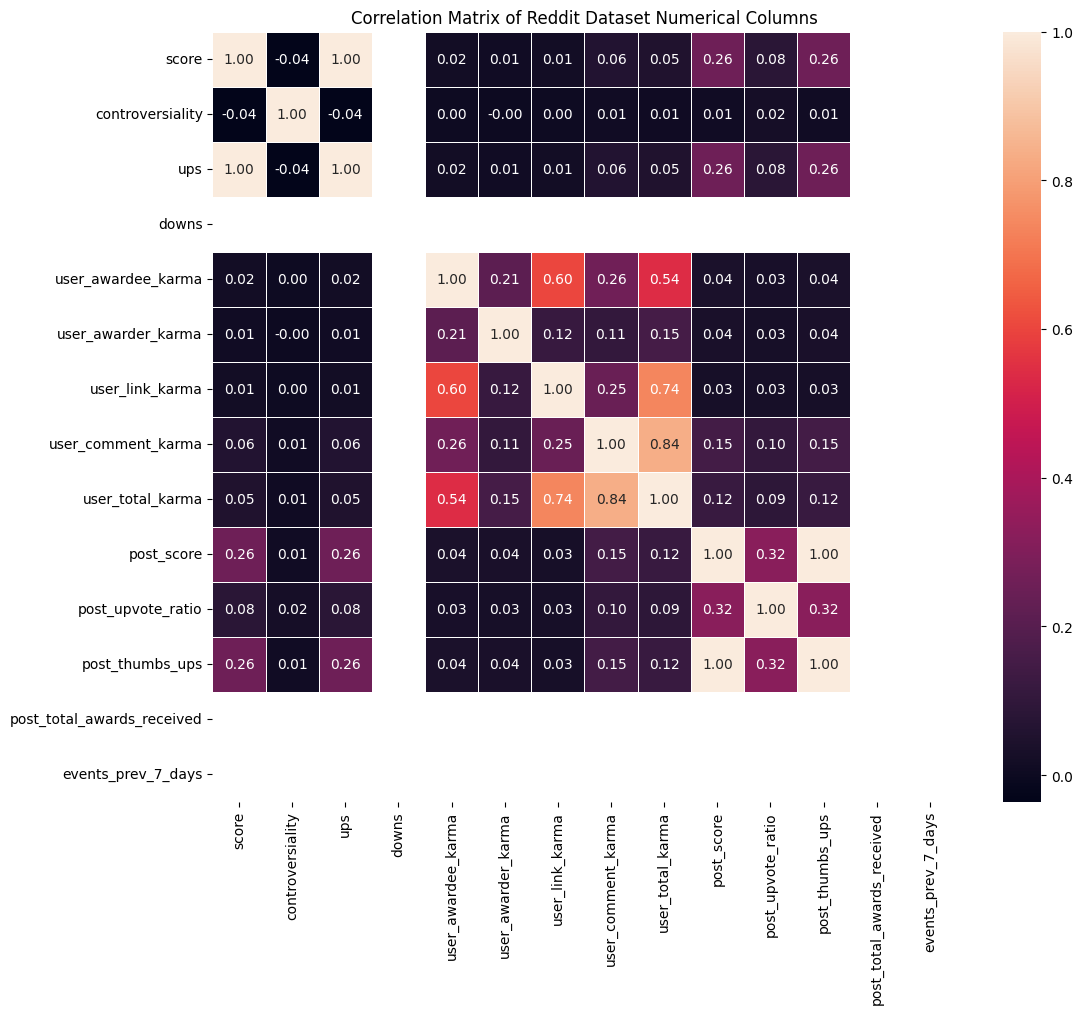

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns_reddit = df_reddit.select_dtypes(
    include=['int64', 'float64'])

correlation_matrix = numerical_columns_reddit.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Reddit Dataset Numerical Columns')
plt.show()

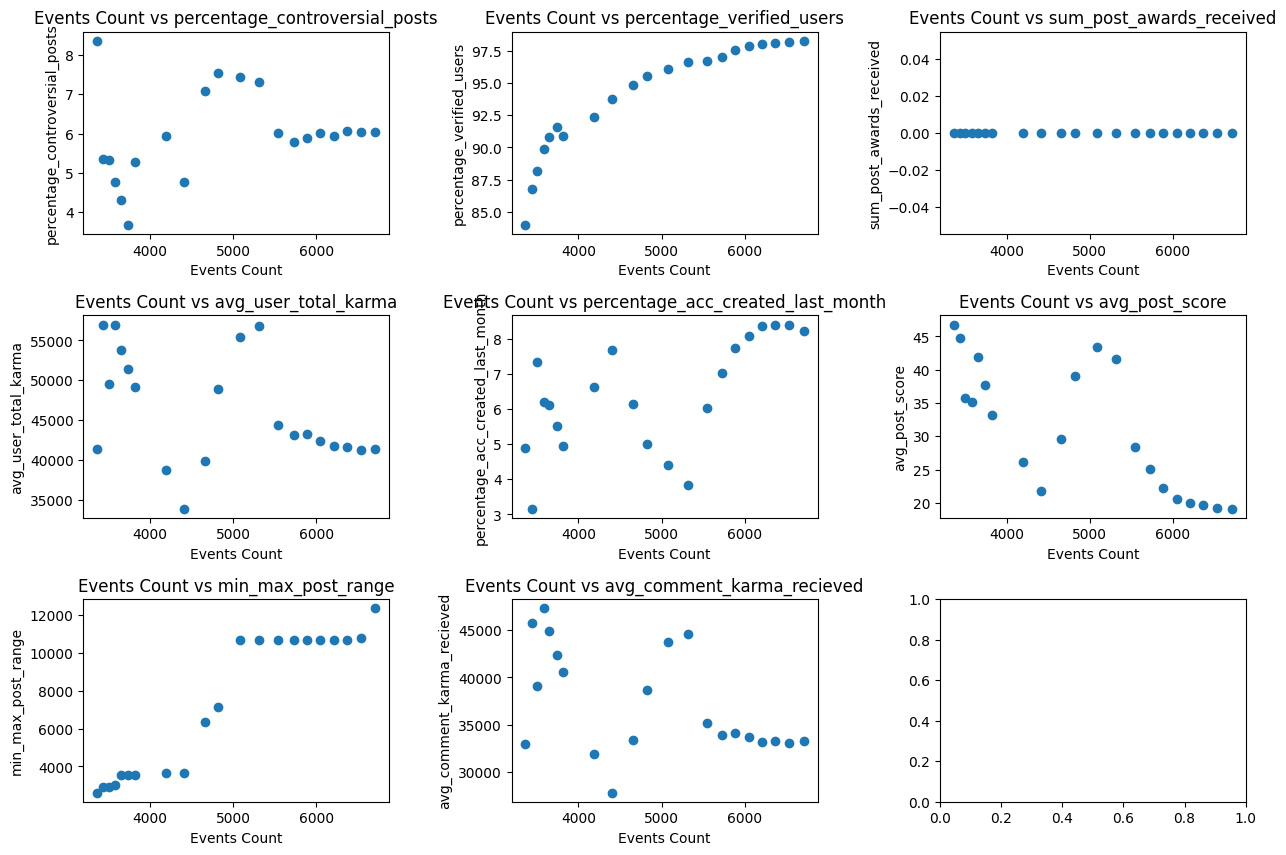

In [48]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, column in enumerate(seven_days_avg_df.columns[1:]):
    ax = axs[i//3, i % 3]
    ax.scatter(seven_days_avg_df["events_count"],
               seven_days_avg_df[column])
    ax.set_title(f'Events Count vs {column}')
    ax.set_xlabel('Events Count')
    ax.set_ylabel(column)


plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = seven_days_avg_df.drop('events_count', axis=1)[
    ["avg_post_score", "percentage_acc_created_last_month", "percentage_acc_created_last_month", "min_max_post_range"]]
y = seven_days_avg_df['events_count']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

"Mse: ", mse, "r^2: ", r2

('Mse: ', 31556.539450859727, 'r^2: ', 0.9728414382293613)

In [25]:
seven_days_avg_df.describe()

,events_count,percentage_controversial_posts,percentage_verified_users,sum_post_awards_received,avg_user_total_karma,percentage_acc_created_last_month,avg_post_score,min_max_post_range,avg_comment_karma_recieved
count,21.00000,21.000000,21.000000,21.0,21.000000,21.000000,21.000000,21.000000,21.000000
mean,4884.47619,5.947335,93.949492,0.0,46281.730847,6.381728,31.014899,7206.428571,37270.519788
std,1150.55398,1.136852,4.231085,0.0,6845.082873,1.597423,9.590366,3720.762188,5590.182341
min,3363.00000,3.662494,83.972125,0.0,33856.277671,3.159341,19.126360,2622.000000,27824.947867
25%,3738.00000,5.313496,90.867925,0.0,41406.599684,4.990365,21.804780,3543.000000,33266.568847
50%,4822.00000,5.948377,95.534587,0.0,43232.572184,6.207483,29.653780,7136.000000,34171.394518
75%,5884.00000,6.054416,97.563873,0.0,51382.115438,7.731211,39.071699,10668.000000,42344.742235
max,6709.00000,8.362369,98.256769,0.0,56985.826923,8.396071,46.773519,12356.000000,47309.926020
